In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.describe()
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## simple linear regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score   

In [ ]:
# for simple linear regression we have to select one feature and target variable 
X=df[['area']] # as we have area which depends on the no of rooms bathrooms
y=df['price'] # price is the target variable which we want to predict

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((436, 1), (109, 1), (436,), (109,))

In [16]:
#standrization for independent data only
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

slope is; [937365.2950322]
intercept is; 4706527.385321101


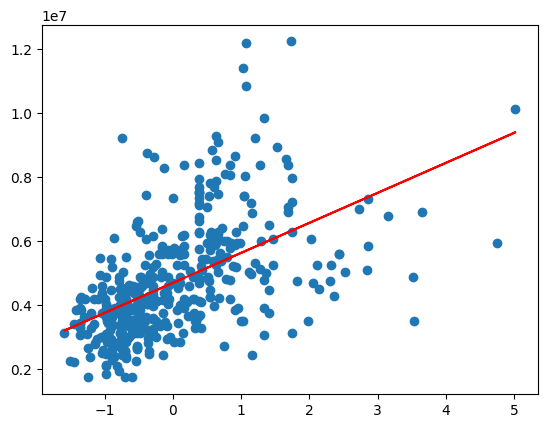

In [17]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)
print("slope is;",reg.coef_)
print("intercept is;",reg.intercept_)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')


In [21]:
# performance matrices
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print('mean squared error = ',mse,"mean absolute error = ",mae,'root mean squqre error = ',rmse)
score=r2_score(y_test,y_test_pred)
print('r2_score = ',score)

mean squared error =  3675286604768.1855 mean absolute error =  1474748.1337969352 root mean squqre error =  1917103.7021424235
r2_score =  0.27287851871974633


In [23]:
coefficients=reg.coef_
intercept=reg.intercept_
print(f"Coefficients: {coefficients}, Intercept: {intercept}")

Coefficients: [937365.2950322], Intercept: 4706527.385321101


## Multiple linear regression


In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [32]:
X=df[['area','bedrooms','bathrooms','stories']]
y=df['price']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((365, 4), (180, 4), (365,), (180,))

In [34]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
reg=LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)
y_test_pred

array([6275933.56931995, 6725023.45461834, 3475919.95347212,
       4478650.22829716, 3657178.40103495, 4671603.10208628,
       5333184.42885889, 5941467.45411824, 3181883.80823985,
       3194071.47229413, 9395234.94831899, 3436960.16422884,
       3358305.49537921, 3780314.38337052, 4100078.69131061,
       6486774.56068775, 3165352.62159009, 4846195.40983749,
       4791063.63260644, 4196308.50929118, 5364450.80884847,
       4710195.34614802, 3332209.78748985, 4037596.01044875,
       5233947.229843  , 7557504.94428766, 3126752.0310088 ,
       4999390.48076691, 7492520.71692792, 3532897.80313042,
       5366935.66230725, 3787665.28700132, 6541250.86384818,
       5072235.6964848 , 4606614.62453664, 5587462.77123145,
       4348539.23403188, 4020380.0599798 , 3480756.71389559,
       5131765.41918488, 5134710.03082711, 3325226.42904058,
       6695619.84009512, 4184614.08306489, 4471967.39544643,
       4154040.81341404, 6980475.70230843, 4556996.02502869,
       4949776.13144887,

In [37]:
# performance matrices
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print('mean squared error = ',mse,"mean absolute error = ",mae,'root mean squqre error = ',rmse)
score=r2_score(y_test,y_test_pred)
print('r2_score = ',score)

mean squared error =  2011228588709.2317 mean absolute error =  1058426.9563986196 root mean squqre error =  1418177.911515065
r2_score =  0.530713758784267


316   -2.215934e+06
77    -7.502345e+04
360    2.340800e+05
90     1.961350e+06
493   -8.571784e+05
           ...     
17     1.060661e+06
402   -6.522031e+05
66     8.736618e+04
238   -1.152046e+06
272    6.405539e+05
Name: price, Length: 180, dtype: float64

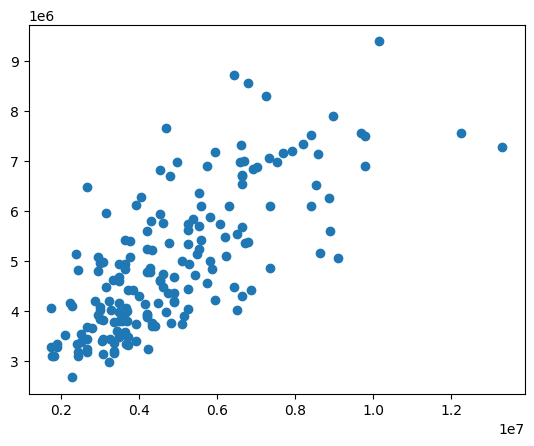

In [38]:
plt.scatter(y_test,y_test_pred)
residuals=y_test-y_test_pred
residuals

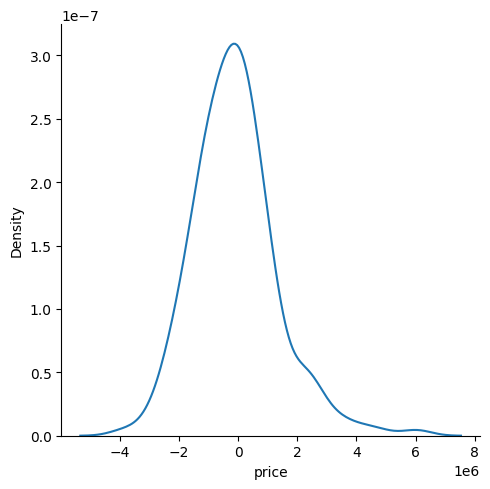

In [39]:
sns.displot(residuals,kind='kde')

In [40]:
reg.coef_

array([778048.41601012, 159232.4015749 , 597957.65869279, 372457.54972821])

In [41]:
reg.intercept_

np.float64(4725939.150684931)